In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle

In [13]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1173,ham,ÌÏ dun need to pick ur gf?,NaN,NaN,NaN
3453,ham,I dont have any of your file in my bag..i was ...,NaN,NaN,NaN
853,ham,\AH POOR BABY!HOPE URFEELING BETTERSN LUV! PRO...,NaN,NaN,NaN
5145,ham,Aiyar u so poor thing... I give u my support k...,NaN,NaN,NaN
1015,ham,"Dear,regret i cudnt pick call.drove down frm c...",NaN,NaN,NaN


In [17]:
df.shape

(5572, 5)

In [35]:
#Data Cleaning
#EDA
#Text preprocessing
#model building
#evaluation
#improvement
#implement
#deployment

# 1. Data Cleaning


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [23]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.rename(columns={'v1':'Target','v2':'Message'}, inplace = True)

In [27]:
df.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
from sklearn.preprocessing import LabelEncoder #assigning 0 and 1 to the value of ham and spam using sklearn 0 for ham, 1 for spam
encoder = LabelEncoder()

In [31]:
df['Target'] = encoder.fit_transform(df['Target'])

In [33]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
#missing values
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [37]:
#duplicates
df.duplicated().sum()

403

In [39]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [41]:
df.duplicated().sum()

0

# 2. EDA

In [43]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

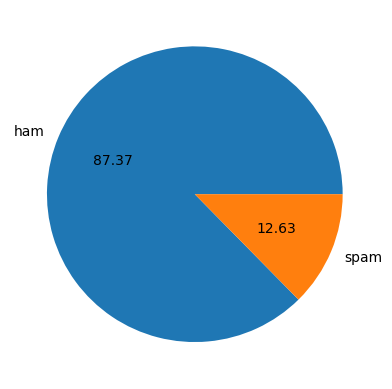

In [45]:
plt.pie(df['Target'].value_counts(), labels =['ham','spam'], autopct='%0.2f')
plt.show()

In [ ]:
#data is imbalanced

In [ ]:
#creating new columns for eda

In [ ]:
#coulums based on len of message

In [47]:
import nltk

In [116]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [49]:
df['count_char'] = df['Message'].apply(len)

In [57]:
df.head()

,Target,Message,count_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [146]:
# df.drop(columns='Count_char',inplace = True)

In [61]:
df.head()

,Target,Message,count_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
#number of words
df['count_word'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [65]:
df.head()

,Target,Message,count_char,count_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [67]:
df['count_sent'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,Target,Message,count_char,count_word,count_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
df[['count_char', 'count_word', 'count_sent']].describe()

,count_char,count_word,count_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
#for ham
df[df['Target'] == 0][['count_char', 'count_word', 'count_sent']].describe()

,count_char,count_word,count_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
#for spam
df[df['Target'] == 1][['count_char', 'count_word', 'count_sent']].describe()

,count_char,count_word,count_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='count_char', ylabel='Count'>

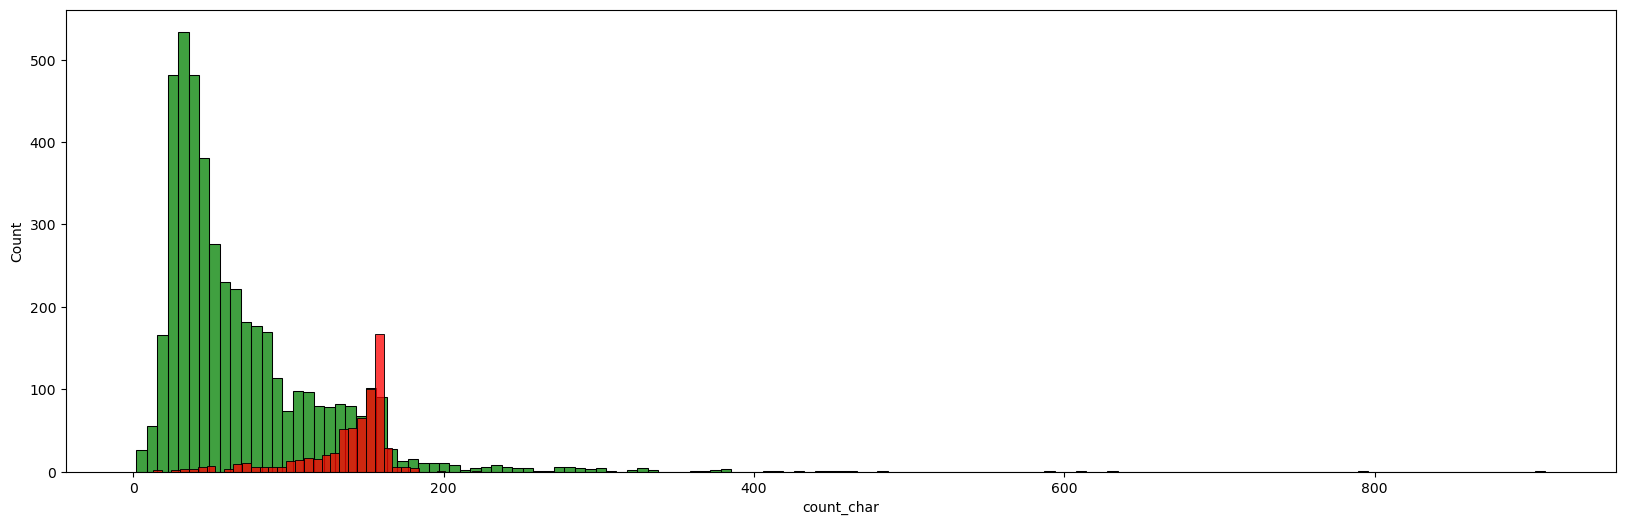

In [79]:
#graphical representation
plt.figure(figsize = (20,6))
sns.histplot(df[df['Target']== 0]['count_char'], color = 'green')
sns.histplot(df[df['Target']== 1]['count_char'], color = 'red')

<Axes: xlabel='count_word', ylabel='Count'>

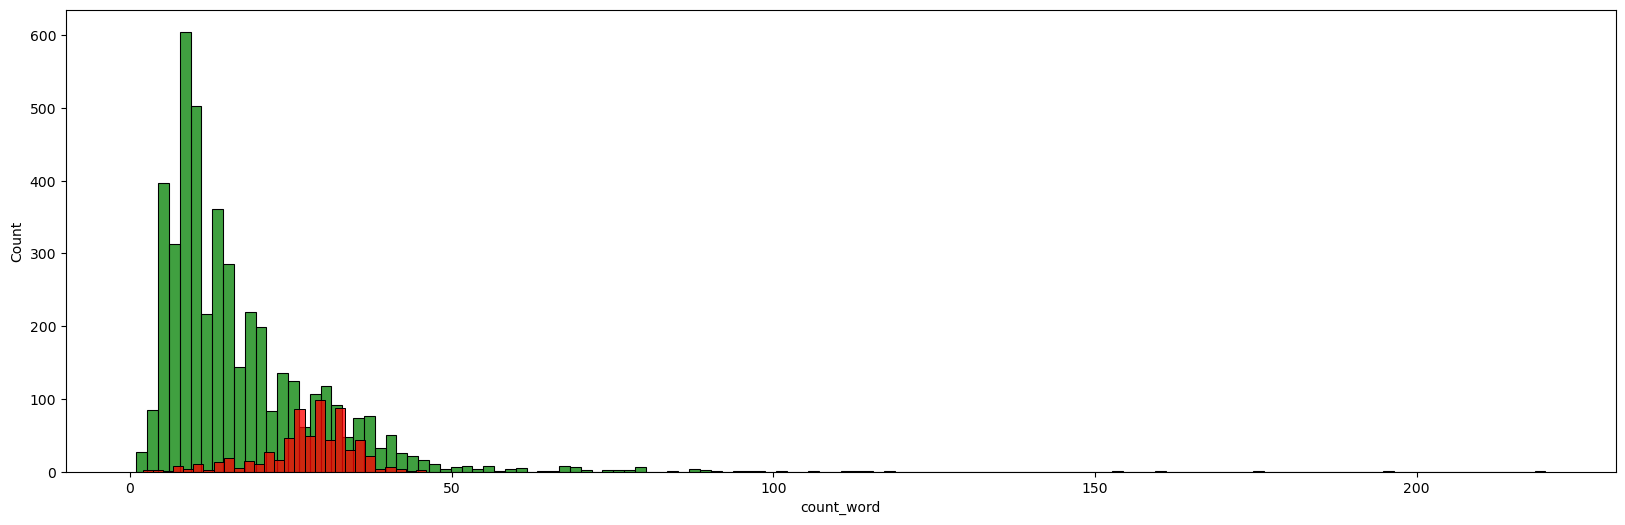

In [81]:
plt.figure(figsize = (20,6))
sns.histplot(df[df['Target']== 0]['count_word'], color = 'green')
sns.histplot(df[df['Target']== 1]['count_word'], color = 'red')

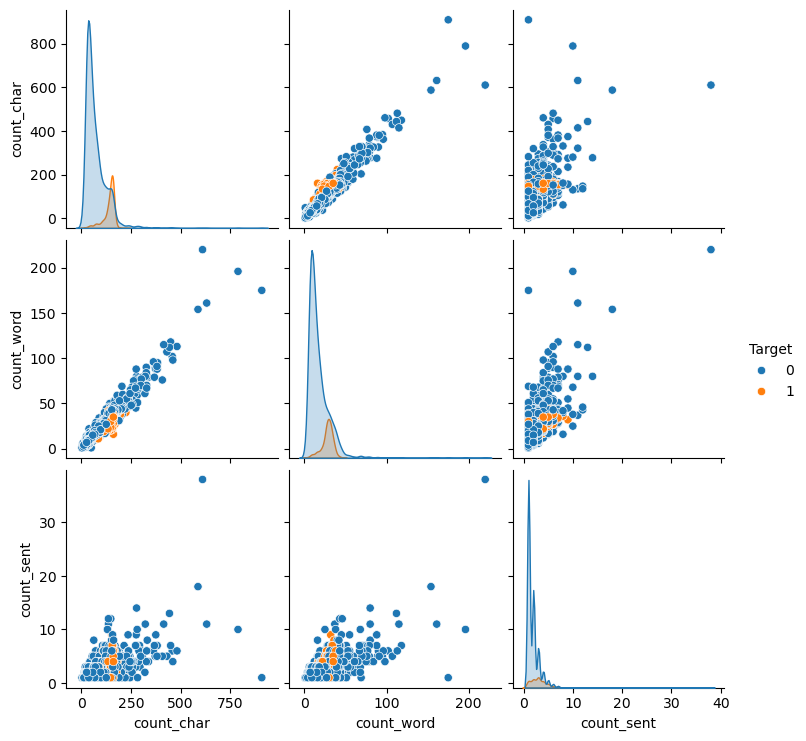

In [83]:
sns.pairplot(df, hue = 'Target')

In [85]:
df[['Target','count_char','count_word','count_sent']].corr()

,Target,count_char,count_word,count_sent
Target,1.000000,0.384717,0.262912,0.263939
count_char,0.384717,1.000000,0.965760,0.624139
count_word,0.262912,0.965760,1.000000,0.679971
count_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

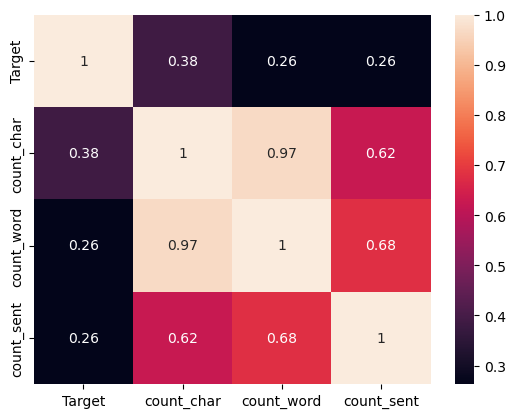

In [87]:
sns.heatmap(df[['Target','count_char','count_word','count_sent']].corr(), annot = True)

# 3. Text/Data Preprocessing

In [ ]:
#lower case
#tokenization
#removing special character
#removing stop words and punctuatuions
#stemming

In [89]:
#stop words
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [95]:
def transfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x = []
    for i in text:
        if i.isalnum():
            x.append(i)

    text = x[:]
    x.clear()
    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            x.append(i)


    text = x[:]
    x.clear()
    for i in text:
        x.append(ps.stem(i))
    return " ".join(x)

In [97]:
transfrom_text('do you like me and my friends dancing')

'like friend danc'

In [99]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [104]:
df['transform_message'] = df['Message'].apply(transfrom_text)

In [106]:
df.head()

,Target,Message,count_char,count_word,count_sent,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [108]:
wc = WordCloud(width = 800, height = 500, min_font_size = 10, background_color = 'white')

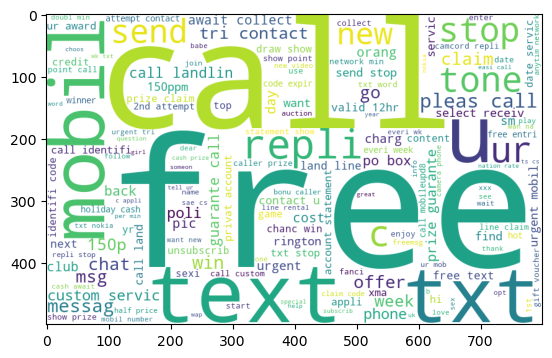

In [110]:
spam_wc = wc.generate(df[df['Target']==1]['transform_message'].str.cat(sep = " "))
plt.imshow(spam_wc)

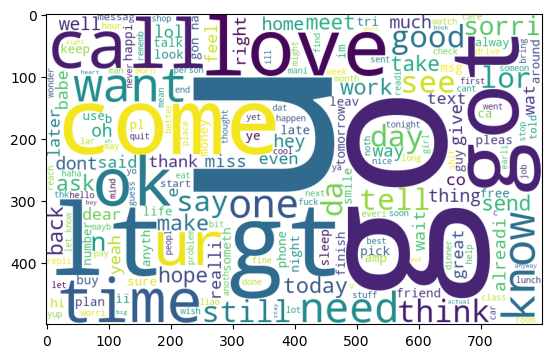

In [112]:
ham_wc = wc.generate(df[df['Target']==0]['transform_message'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [114]:
spam = []
for msg in df[df['Target'] == 1]['transform_message'].tolist():
    for words in msg.split():
        spam.append(words)


In [116]:
len(spam)

9939

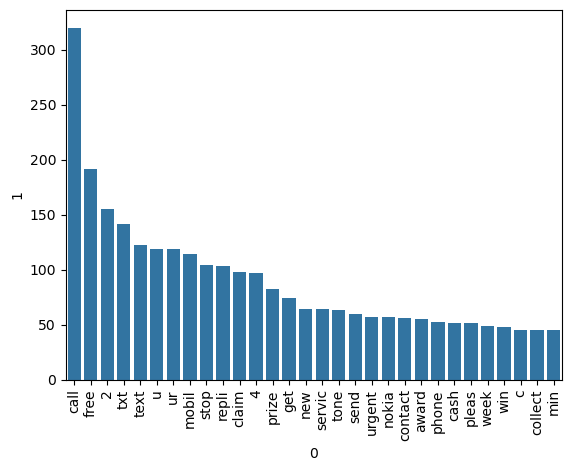

In [118]:
from collections import Counter
sns.barplot(
    x = pd.DataFrame(Counter(spam).most_common(30))[0], 
    y = pd.DataFrame(Counter(spam).most_common(30))[1]
)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building (Navie Bayes Classifier)

In [ ]:
#while doing classfication data must be in numerical form
#so vectorizing our data

In [120]:
df.head()

,Target,Message,count_char,count_word,count_sent,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [122]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()  #not satisfied with countvectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [124]:
x = tfidf.fit_transform(df['transform_message']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
x.shape

(5169, 3000)

In [128]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [130]:
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [134]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [136]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [138]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [140]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

#as we are working with spam classifier so percision is what matters most
# so we will choose multinomial nave bayes


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [142]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# checking more ML algos

In [498]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [500]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [502]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [504]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [506]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [520]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\vinay\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [524]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [526]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [528]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [530]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


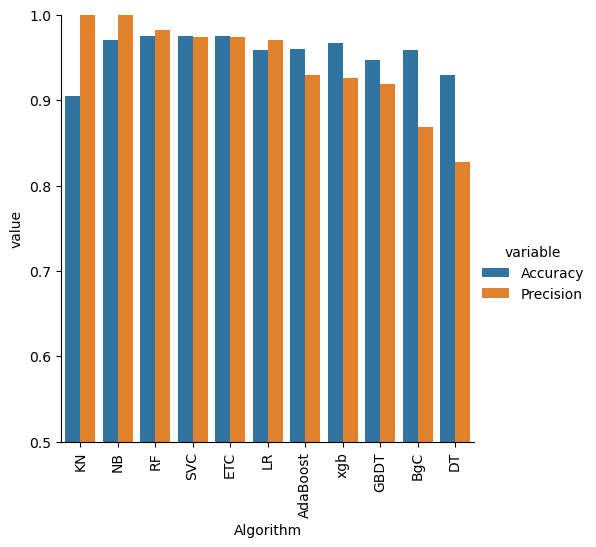

In [532]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [3]:
# could use more ml algos but at the end most suited one is NB algo

In [144]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))